In [11]:
from sympy import symbols
from sympy.plotting import plot
import matplotlib.pyplot as plt
from sympy import init_printing
init_printing() 
%matplotlib inline

# Teoria Evolutiva de Grafos

Neste notebook vamos explorar modelos evolutivos em que os invidíduos são representados pelos nós de um grafo, ao invés de pertencerem a uma população homogênea. A arestas do grafo representam as interações competitivas. Se existe uma aresta entre os nós $i$ e $j$, significa que a prole de $i$ pode vir a substituir $j$. 

As principais questões que a teoria evolutiva de grafos visa responder são:

1. Será que a topologia dos grafos pode influenciar a taxa de evolução?
1. Podemos encontrar uma topologia que reduza a probabilidade de fixação de um mutante vantajoso?
1. Será que existem grafos capazes de anular completamente o efeito da seleção?
1. É possivel caracterizar os grafos que apresentam dinâmicas evolutivas similaers a populações não estruturadas, ou seja homogêneas?
1. etc.

Seja uma população com $N$ indivíduos $i$, $i=1,2,\ldots , N$. A probabilidade da prole de $i$ substituir $j$ é denotada por $w_{ij}$. Logo,  o processo é determinado por uma matriz $W=[w_{ij}]$.

A matriz $W$ é estocástica pois é composta apenas por probabilidades e, como a prole de cada nó tem que necessáriamente ir para algum lugar, $\sum_{j=1}^N w_{ij} = 1$.

A matriz $W$ define um grafo direcionado ponderado.

Esta idéia deriva do [Processo de Moran](https://en.wikipedia.org/wiki/Moran_process), um processo estocástico muito usado em  biologia para simular evolução em populações finitas. No processo de Moran, a cada passo de tempo um indivíduo é selecionado aleatóriamente para se reproduzir e outro para morrer (de maneira a manter a população constante). A probabilidade de seleção de um tipo para reprodução, é proporcional ao seu fitness. em um grafo completo a probabilidade de fixação de um tipo é dada por:

$$\rho = \frac{1-1/r}{1-1/r^n}$$

Onde $r$ é o fitness relativo (razão entre o fitness do indivíduo e o fitness médio da população) do tipo em questão.

Uma população não estruturada, pode ser representada por um grafo completo. Seu processo evolutivo é equivalente ao do processo de Moran.

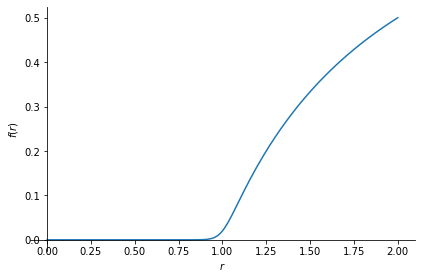

In [2]:
r = symbols('r')
n=50
plot((1-r**-1)/(1-r**-n), (r,0,2));

## Ciclo Direcionado
Qual a probabilidade de fixação de um mutante que surja em uma posição aleatória de um ciclo direcionado?

In [3]:
import networkx as nx

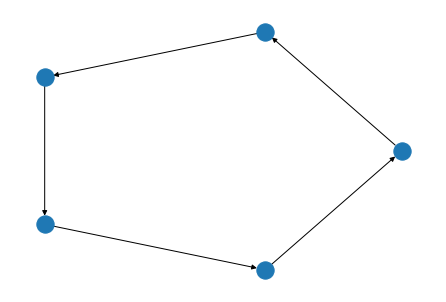

In [4]:
g = nx.cycle_graph(5, create_using=nx.digraph.DiGraph)
nx.draw_circular(g)

In [12]:
# Adjacency matrix
nx.to_numpy_array(g)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

Inicialmente, todos os indivíduos são do tipo $A$. Depois de algum tempo, um mutante $B$ surge com fitness relativo $r$. Este indivíduo dá origem a uma linhagem que tem dois destinos possíveis: a extinção ou a dominação total.

Seja $m$ o número de indivíduos $B$. Para reduzir m em 1, o indivíduo $A$ imediatamente antecedente ao cluster de $B$ deve ser selecionado para reprodução. Logo a probabilidade de passar de $m$ para $m-1$ é dada por

$$P_{m,m-1}=\frac{1}{N-m+rm}$$ 

Para aumentar $m$ em 1, o indivíduo B no final do cluster, tem que ser escolhido para reprodução. logo a probabilidade de passar de $m$ para $m+1$ é dada por

$$P_{m,m+1}=\frac{r}{N-m+rm}$$

A razão destas duas probabilidades é 

$$\gamma_m = \frac{P_{m,m-1}}{P_{m,m+1}} = \frac{1}{r}$$

Pela teoria do processo de Moran, a probabilidade de fixação de um processo de nascimento e morte é dada por

$$\rho=\frac{1}{1+\sum_{k=1}^{N-1}\prod_{m=1}^k \gamma_m}$$

daí obtemos 

$$\rho=\frac{1-1/r}{1-1/r^N}$$

A probabilidade de fixação do ciclo direcionado é a mesma do processo de Moran. Pode-se mostrar que o mesmo é verdadeiro para o ciclo não direcionado.

## Grafos de Linha e Estrela
Nestes dois tipos de grafo , pode-se verificar graficamente que a probabilidade de fixação $\rho=1/N$, ou seja maior do que no processo de Moran, ou nos grafos apresentados acima. Estes grafos são supressores de seleção, pois a probabilidade de fixação não depende do fitness.

#### Exercício 1:
Calcule a distribuição dos tempos até a fixação de grafos em linha e em estrela. Considere uma taxa de nascimento constante. Compare as distribuições, Discuta.

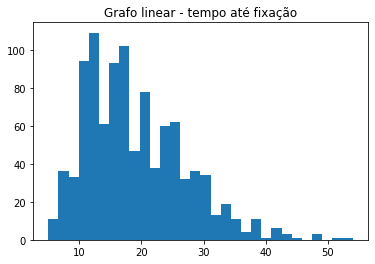

In [14]:
import numpy as np
from numpy.random import multinomial as mnrvs
r=1.2
g = np.array([1, 0, 0, 0, 0])

N = len(g)
passos = []
for i in range(1000):
    step = 1
    while sum(g)<5:
        fitness = np.array([r if i==1 else 1 for i in g])
        m = sum(g)
        n = len(g)-m
        repr = list(mnrvs(1, fitness/fitness.sum(), 1)[0]).index(1)
        #print("vertice reproduzindo no passo %s: %s"%(step,repr))
        if repr < 4:
            g[repr+1] = g[repr]
        #print("m=%s"%sum(g))
        step +=1
    passos.append(step)
    g = np.array([1, 0, 0, 0, 0])
plt.clf()
plt.hist(passos, bins=30)
plt.title(u"Grafo linear - tempo até fixação");

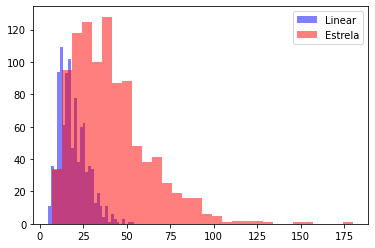

In [15]:
from numpy.random import randint
r=1.2
g = np.array([1, 0, 0, 0, 0])
fitness = np.array([r,1,1,1,1])
N = len(g)
Spassos = []
for i in range(1000):
    step = 1
    while sum(g)<5:
        fitness = np.array([r if i==1 else 1 for i in g])
        m = sum(g)
        n = len(g)-m
        repr = list(mnrvs(1, fitness/fitness.sum(), 1)[0]).index(1)
        #print("vertice reproduzindo no passo %s: %s"%(step,repr))
        if repr == 0:
            destino  = randint(1,5,1)[0]
            g[destino] = g[0]
        #print(i,"m=%s"%sum(g),g)
        step +=1
    Spassos.append(step)
    #print(g,Spassos)
    g = np.array([1, 0, 0, 0, 0])
plt.clf()
plt.hist(passos,bins=30, color='b', label='Linear', alpha=0.5)
plt.hist(Spassos,bins=30, color='r', label='Estrela', alpha=0.5)
plt.legend();

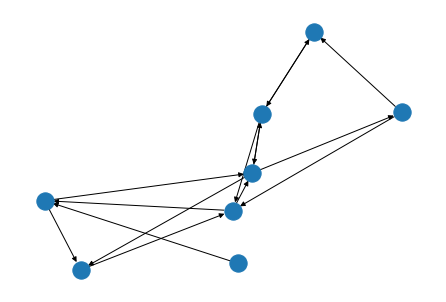

In [19]:
grafo=nx.binomial_graph(8,.2, directed=True)
nx.draw(grafo)

Seja $\alpha_i = P(i\rightarrow i+1)$ e $\beta_i = P(i\rightarrow i-1)$. Seja $\gamma_i = \beta_i / \alpha_1$. Se começarmos com um mutante em um grafo de N nós, 
\begin{equation}
\rho = \frac{1}{1+\sum_{j=1}^{N-1} \prod_{k=1}^j\gamma_k}
\end{equation}

#### Exercício 3:
1. Implemente uma função para simular a reprodução  em grafos de acordo com as regras descritas no início desta planilha. 
1. Utilizando os grafos do exercício anterior, construa um gráfico do tempo até a fixação em cada grafo em função do tamanho do grafo. Escolha com parcimônia o tamanho dos grafos. Como o processo de Moran é estocástico você terá que calcular multiplas vezes a simulação para cada par (grafo, tamanho).

In [42]:
import random
def SimulaMoran(grafo,r):
    n = grafo.order()
    a = np.random.randint(8)
    mutantes=[a]
    nummut=1
    yield mutantes,nummut
    nãomutantes=list(range(a))+list(range(a+1,n))
    while (nummut!=0)&(nummut!=n):
        x=random.uniform(0,n-nummut+nummut*r)
        if x<n-nummut:
            a=nãomutantes[int(x)]
            vizinhos=list(grafo.neighbors(a))
            if vizinhos==[]:
                continue
            b=random.choice(list(grafo.neighbors(a)))
            if b in mutantes:
                mutantes.remove(b)
                nãomutantes.append(b)
                nummut-=1
            yield mutantes,nummut
        else:
            a=mutantes[int((x-n+nummut)/r)]
            vizinhos=list(grafo.neighbors(a))
            if vizinhos==[]:
                continue
            b=random.choice(list(grafo.neighbors(a)))
            if b in nãomutantes:
                nãomutantes.remove(b)
                mutantes.append(b)
                nummut+=1
        yield mutantes,nummut

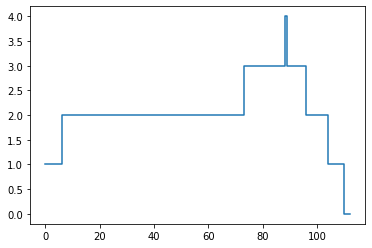

In [52]:
P=[]
i=0
for mutantes,nummut in SimulaMoran(grafo,1.5):
 P.append((i,nummut))
 i+=1
P = np.array(P)
plt.plot(P[:,0],P[:,1],ds='steps');

## O teorema Isotérmico
A temperatura de um vértice é a soma de todos os pesos chegando a ele. O teorema isotérmico diz que:

Se todos os vértices têm a mesma temperatura,então a probabilidade de fixação é equivalente à do processo de Moran.

Como nestes grafos evolutivos, as arestas representam probabilidade de que a prole de $i$ substitua a de $j$, para o grafo ser isotérmico, a matriz deve ser duplamente estocástica.

#### Exercício 4:  
Prove que para um grafo populacional ser $\rho$-equivalente ao processo de Moran, ele precisa ser isotérmico, ou seja, sua matriz $W=[w_{ij}]$ é duplamente estocástica.

### Amplificando e suprimindo a Seleção
Um vértice raiz é um vértice sem nenhuma aresta levando a ele. Uma raiz tem temperatura zero. Se um grafo tem apenas uma raiz, sua probabilidade de fixação é de $1/N$. A única forma de um mutante dominar toda a população é se ele for introduzido no vértice raiz.

Se um grafo possui multiplas raízes, então nenhum mutante será capaz de se fixar. mutantes que surjam em uma das raízes darão origem a linhagens que jamais serão extintas. Logo grafos com multiplas raízes permitem a coexistência de múltiplas linhagens.

#### Construindo um supressor de seleção
Uma maneira simples de construir um grafo supressor de seleção é dividir a populações em duas subpopulações de tamanho $n_1$ e $n_2$ tal que $n_1+n_2=N$. A primeira subpopulação forma um grafo completo e a segunda formará um grafo com a única restrição de que todos os nós desta segunda subpopulação possam ser alcançados a partir da primeira. Assim a probabilidade de fixação fica sendo:

$$\rho_G=\frac{1-1/r}{1-1/r^{n_1}}$$

Logo, neste caso $1/N < \rho_G < \rho_M(N)$

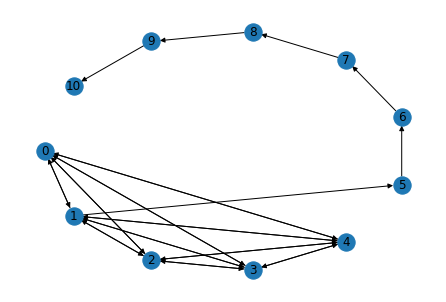

In [99]:
n1=5
n2 =6
g = nx.complete_graph(n1, create_using=nx.DiGraph) 
h = nx.path_graph(n2, create_using=nx.DiGraph)
h = nx.relabel_nodes(h, dict(zip(h,range(n1,n1+n2+1))))
G = nx.compose(g,h)
G.add_edge(1,n1)
nx.draw_shell(G, with_labels=True)

### Estimando o $\rho_G$ de um grafo qualquer:
Aqui vamos usar o método de monte-carlo para estimar $\rho_G$, ou seja, vamos realizar a dinâmica evolutiva um grande número de vezes em um grafo e obter assim a probabilidade de fixação.

In [91]:
def passo_evolutivo(Gr, As, r=1):
    """
    Passo evolutivo.
    Gr: grafo
    As: Vertices do tipo A
    r: fitness relativo rb/ra
    """
    a = len(As)
    Bs = [i for i in Gr.nodes if i not in As]
    b = len(Bs)
    # Seleciona quem vai se reproduzir e descobre a vizinhanca
    if np.random.random() <= 1/(a+r*b):
        nbs = list(Gr.neighbors(As[np.random.randint(0,a)]))
        reprodutor = 'A'
    else:
        nbs = list(Gr.neighbors(Bs[np.random.randint(0,b)])) #Gr.neighbors_out(Bs[randrange(b)])
        reprodutor = 'B'
    n = len(nbs)
    if n != 0: # Caso existam vizinhos
        m = nbs[np.random.randint(0,n)] # m recebera a prole
        if reprodutor == 'A':
            if m in As:
                pass
            else:
                As.append(m)
        elif reprodutor == 'B':
            if m in As:
                As.remove(m)
            else:
                pass
    return As
    
def estima_rho(Gr, r=1, n_iter_1=1000, n_iter_2=1000):
    l = len(Gr.nodes)
    s = len([x for x in Gr.nodes() if Gr.out_degree(x)>=1 and Gr.in_degree(x)==0])
    if s == 1: # se o Grafo possui uma unica raiz
        rho = 1./l
    elif s > 1: #Grafo possui mais de uma raiz
        rho = 0
    else: # grafo não tem raízes
        rhos = 0
        for i in range(n_iter_1):
            As = list(range(l)) # Inicialmente todos são do tipo A
            As.pop(np.random.randint(0,l)) # um mutante entra em uma posição aleatoria
            j = 0
            while len(As)>0 and len(As)<l and j<n_iter_2:
                As = passo_evolutivo(Gr,As,r)
                j += 1
            if len(As) == 0: # Ocorreu a fixação em até n_iter_2 passos
                rhos += 1
        rho = float(rhos/n_iter_1)
    return rho

O $\rho_G$ esperado é, neste caso:

$\frac{1-1/r}{1-1/r^{n1}}$

In [104]:
rho_M = symbols('rho_M')
r=10.7
rho_G = (1-1/r)/(1-1/r**n1)
print(rho_M,": ", (1-1/r)/(1-1/r**(n1+n2)))
print("Esperado(rho_G): ", rho_G)
print("Estimado (monte carlo): ", estima_rho(G,r,100,700000))


rho_M :  0.9065420560790733
Esperado(rho_G):  0.9065485196404217
Estimado (monte carlo):  0.45
